## IMPORT 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import googletrans
import warnings
warnings.filterwarnings("ignore")

## LOAD DATA

In [46]:

Sekunder = pd.read_csv('hasil_label_sentiment.csv')
display(Sekunder.head())
display(Sekunder.tail())

,content,score,label
0,Banyak penjual barang yang menjual tidak sesua...,1,negative
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative
3,Parah beli barang malah di tuduh manipulasi da...,1,negative
4,terimakasih ok bangat,5,positive


,content,score,label
41881,"best indonesian online market place, imho",5,positive
41882,Good,5,positive
41883,"stop pake sapx sebagai gratis ongkir oi, baran...",1,negative
41884,untuk kurir2 yang katanya rekomendasi tokopedi...,1,negative
41885,"Slow respon, no solution 🤗",1,negative


## EDA PART 1

In [47]:
Sekunder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41886 entries, 0 to 41885
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  41886 non-null  object
 1   score    41886 non-null  int64 
 2   label    41886 non-null  object
dtypes: int64(1), object(2)
memory usage: 981.8+ KB


In [48]:
Sekunder.describe()

,score
count,41886.000000
mean,2.924318
std,1.903924
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,5.000000


In [49]:
Sekunder.describe(include='object')

,content,label
count,41886,41886
unique,34299,2
top,mantap,negative
freq,923,21861


In [50]:
Sekunder_Process = Sekunder.copy()

## Data Preprocessing

### Lower Case

In [52]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

# Buat kolom tambahan untuk data description yang telah dicasefolding  
Sekunder_Process['Lower_Case'] = Sekunder_Process['content'].apply(clean_lower)
Sekunder_Process.head()

,content,score,label,Lower_Case
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat


### Remove Punctuation

In [53]:
import re
#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')

def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
Sekunder_Process['Clean_Punct'] = Sekunder_Process['Lower_Case'].apply(clean_punct)
Sekunder_Process.head()

,content,score,label,Lower_Case,Clean_Punct
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat


### Normalize Number

In [55]:
def remove_numbers_and_units(text):
    # Hapus angka
    text = re.sub(r'\d+', ' ', text)
    # Hapus satuan panjang, berat, volume, mata uang, dan kata terkait
    units = r'\b(ribu|ratus|puluh|juta|miliar|triliun|unit|pcs|gram|kg|liter|ml|cm|meter|m|km|rp|rupiah|dollar|usd|idr|hari|minggu|bulan|tahun|jam|menit|detik)\b'
    text = re.sub(units, ' ', text, flags=re.IGNORECASE)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Contoh penggunaan pada dataframe
Sekunder_Process['No_NB'] = Sekunder_Process['Clean_Punct'].apply(remove_numbers_and_units)
Sekunder_Process.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat


### Normalize Whitespace

In [56]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

Sekunder_Process['Clean_Double_WS'] = Sekunder_Process['No_NB'].apply(_normalize_whitespace)
Sekunder_Process.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat


### Normalize Slangs

Top Tokens in Clean_Double_WS column:


,Token,Frequency
0,di,11915
1,tokopedia,7837
2,saya,7805
3,dan,7491
4,tidak,7438
...,...,...
27850,experiencee,1
27851,shtt,1
27852,seindah,1
27853,dlsbnya,1


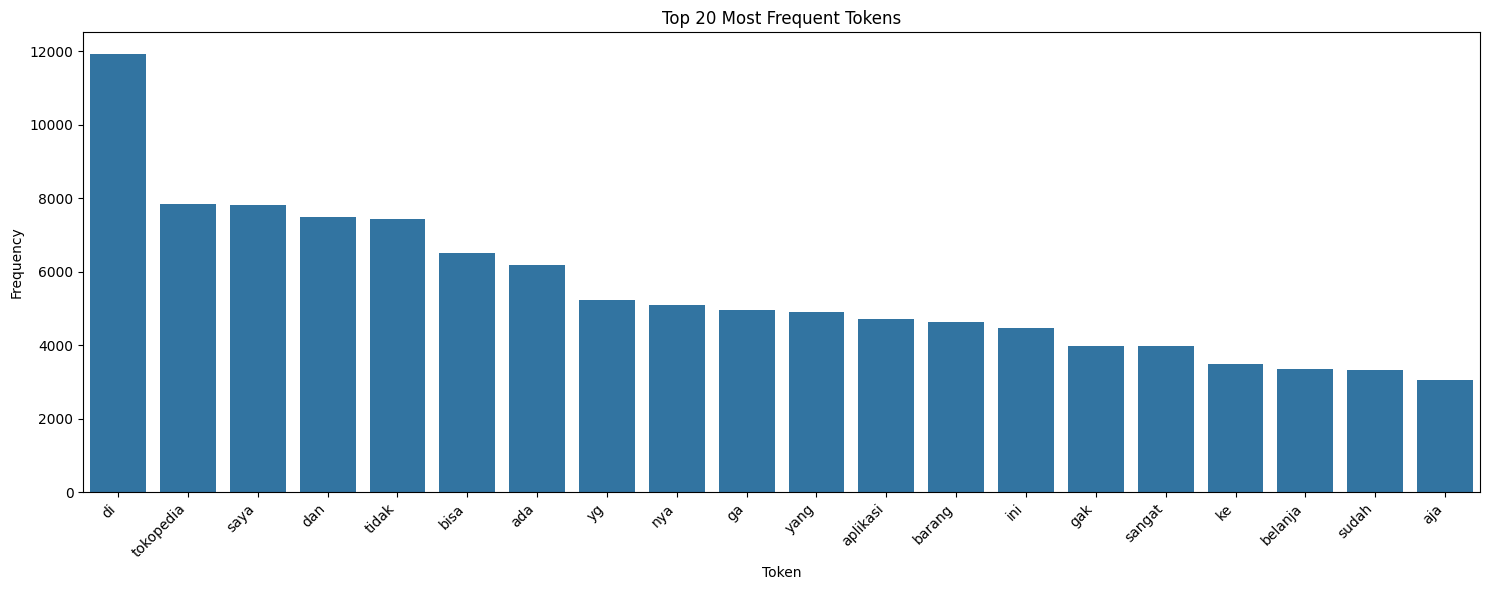

In [69]:
from collections import Counter

# Gabungkan semua teks dari kolom Clean_Double_WS
all_text = ' '.join(Sekunder_Process['Clean_Double_WS'].astype(str))

# Tokenisasi text
tokens = all_text.split()

# Hitung frekuensi kata menggunakan Counter
word_freq = Counter(tokens)

# Konversi ke DataFrame untuk visualisasi yang lebih baik
word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['Token', 'Frequency'])

# Tampilkan hasil
print("Top Tokens in Clean_Double_WS column:")
display(word_freq_df)

# Visualisasi menggunakan barplot untuk top 20 tokens
plt.figure(figsize=(15, 6))
sns.barplot(data=word_freq_df.head(20), x='Token', y='Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Tokens')
plt.tight_layout()
plt.show()

In [78]:
import pandas as pd
from IPython.display import display

# Load wordlist
slang_dict = pd.read_csv("new_kamusalay.csv", header=None, names=["alay", "formal"])
mapping = dict(zip(slang_dict['alay'], slang_dict['formal']))

# Fungsi normalisasi slang
def normalize_slang(text):
    if not isinstance(text, str):
        return text
    
    words = text.lower().split()
    normalized_words = [mapping.get(word, word) for word in words]
    return " ".join(normalized_words)

# Terapkan ke dataframe kamu
Sekunder_Process['normalized'] = Sekunder_Process['Clean_Double_WS'].apply(normalize_slang)

display(Sekunder_Process)


,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS,tokens,normalized
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"[banyak, penjual, barang, yang, menjual, tidak...",banyak penjual barang yang menjual tidak sesua...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...,"[gk, jelas, tiba, pembatalan, pesanan, katanya...",tidak jelas tiba pembatalan pesanan katanya ti...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...,"[expedisi, nya, ga, jelas, kirim, paket, aja, ...",expedisi nya tidak jelas kirim paket saja samp...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"[parah, beli, barang, malah, di, tuduh, manipu...",parah beli barang malah di tuduh manipulasi da...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,"[terimakasih, ok, bangat]",terima kasih oke banget
...,...,...,...,...,...,...,...,...,...
41881,"best indonesian online market place, imho",5,positive,"best indonesian online market place, imho",best indonesian online market place imho,best indonesian online market place imho,best indonesian online market place imho,"[best, indonesian, online, market, place, imho]",best indonesia online market place imho
41882,Good,5,positive,good,good,good,good,[good],bagus
41883,"stop pake sapx sebagai gratis ongkir oi, baran...",1,negative,"stop pake sapx sebagai gratis ongkir oi, baran...",stop pake sapx sebagai gratis ongkir oi barang...,stop pake sapx sebagai gratis ongkir oi barang...,stop pake sapx sebagai gratis ongkir oi barang...,"[stop, pake, sapx, sebagai, gratis, ongkir, oi...",stop pakai sapx sebagai gratis ongkos kirim oi...
41884,untuk kurir2 yang katanya rekomendasi tokopedi...,1,negative,untuk kurir2 yang katanya rekomendasi tokopedi...,untuk kurir2 yang katanya rekomendasi tokopedi...,untuk kurir yang katanya rekomendasi tokopedia...,untuk kurir yang katanya rekomendasi tokopedia...,"[untuk, kurir, yang, katanya, rekomendasi, tok...",untuk kurir yang katanya rekomendasi tokopedia...


### Translator

In [80]:
from deep_translator import GoogleTranslator
from tqdm.auto import tqdm
import pandas as pd

translator = GoogleTranslator(source="auto", target="id")
tqdm.pandas(desc="Translating to Indonesian")

def translate_to_indonesian(text: str) -> str:
    if not isinstance(text, str) or not text.strip():
        return text
    try:
        return translator.translate(text)
    except Exception as e:
        print(f"Translate failed: {text[:40]}... -> {e}")
        return text  # fallback ke teks asli

# ======================
# 1) Translate ke Bahasa Indonesia
# ======================
Sekunder_Process["translated"] = Sekunder_Process["normalized"].progress_apply(translate_to_indonesian)

# ======================
# 2) Tokenisasi kolom "translated"
# ======================
def tokenize_text(text: str):
    if not isinstance(text, str):
        return text
    return text.lower().split()  # sederhana: pisah berdasarkan spasi

Sekunder_Process["tokenized"] = Sekunder_Process["translated"].apply(tokenize_text)

# ======================
# 3) Tampilkan hasil contoh
# ======================
with pd.option_context("display.max_rows", 5, "display.max_colwidth", None):
    display(Sekunder_Process[["normalized", "translated", "tokenized"]].head())

# ======================
# 4) Export ke CSV
# ======================
output_file = "hasil_translate_tokenized.csv"
Sekunder_Process.to_csv(output_file, index=False, encoding="utf-8")
print(f"\n✅ File berhasil disimpan sebagai: {output_file}")


Translating to Indonesian: 100%|██████████| 41886/41886 [2:21:30<00:00,  4.93it/s]  


,normalized,translated,tokenized
0,banyak penjual barang yang menjual tidak sesuai di etalase seharusnya pihak e commerce bisa melakukan kroscek dahulu sebelum penjual membuka lapak al hasil konsumen yang serius belanja jadi sering tertipu barang yang di beli tidak sesuai di etalase ingat konsumen dilindungi undang undang no tentang perlindungan konsumen jadi jangan main main terima kasih,banyak penjual barang yang menjual tidak sesuai di etalase seharusnya pihak e commerce bisa melakukan kroscek dahulu sebelum penjual membuka lapak al hasil konsumen yang serius belanja jadi sering tertipu barang yang di beli tidak sesuai di etalase ingat konsumen dilindungi undang undang no tentang perlindungan konsumen jadi jangan main main terima kasih,"[banyak, penjual, barang, yang, menjual, tidak, sesuai, di, etalase, seharusnya, pihak, e, commerce, bisa, melakukan, kroscek, dahulu, sebelum, penjual, membuka, lapak, al, hasil, konsumen, yang, serius, belanja, jadi, sering, tertipu, barang, yang, di, beli, tidak, sesuai, di, etalase, ingat, konsumen, dilindungi, undang, undang, no, tentang, perlindungan, konsumen, jadi, jangan, main, main, terima, kasih]"
1,tidak jelas tiba pembatalan pesanan katanya tidak memenuhi syarat dan ketentuan yang berlaku orang dari kalian yang kasih promo tiba dibatalkan sendiri aneh pokoknya sekarang tidak usah pakai tokopedia lagi tidak jelas,tidak jelas tiba pembatalan pesanan katanya tidak memenuhi syarat dan ketentuan yang berlaku orang dari kalian yang kasih promo tiba dibatalkan sendiri aneh pokoknya sekarang tidak usah pakai tokopedia lagi tidak jelas,"[tidak, jelas, tiba, pembatalan, pesanan, katanya, tidak, memenuhi, syarat, dan, ketentuan, yang, berlaku, orang, dari, kalian, yang, kasih, promo, tiba, dibatalkan, sendiri, aneh, pokoknya, sekarang, tidak, usah, pakai, tokopedia, lagi, tidak, jelas]"
2,expedisi nya tidak jelas kirim paket saja sampai seminggu tidak di kirim padahal sama di daerah jakarta malah di tahan di kurir,expedisi nya tidak jelas kirim paket saja sampai seminggu tidak di kirim padahal sama di daerah jakarta malah di tahan di kurir,"[expedisi, nya, tidak, jelas, kirim, paket, saja, sampai, seminggu, tidak, di, kirim, padahal, sama, di, daerah, jakarta, malah, di, tahan, di, kurir]"
3,parah beli barang malah di tuduh manipulasi data padahal data saya sesuai semua sama akun di gopartner mending belanja di tetangga sebelah laz,parah beli barang malah di tuduh manipulasi data padahal data saya sesuai semua sama akun di gopartner mending belanja di tetangga sebelah laz,"[parah, beli, barang, malah, di, tuduh, manipulasi, data, padahal, data, saya, sesuai, semua, sama, akun, di, gopartner, mending, belanja, di, tetangga, sebelah, laz]"
4,terima kasih oke banget,terima kasih oke banget,"[terima, kasih, oke, banget]"



✅ File berhasil disimpan sebagai: hasil_translate_tokenized.csv


In [ ]:
Sekunder_Process['stemmed_text'] = Sekunder_Process['stemmed_text'].str.replace('padat', 'mantap')
display(Sekunder_Process[['stemmed_text']].head())

In [81]:
Sekunder_Process.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS,tokens,normalized,translated,tokenized
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"[banyak, penjual, barang, yang, menjual, tidak...",banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"[banyak, penjual, barang, yang, menjual, tidak..."
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...,"[gk, jelas, tiba, pembatalan, pesanan, katanya...",tidak jelas tiba pembatalan pesanan katanya ti...,tidak jelas tiba pembatalan pesanan katanya ti...,"[tidak, jelas, tiba, pembatalan, pesanan, kata..."
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...,"[expedisi, nya, ga, jelas, kirim, paket, aja, ...",expedisi nya tidak jelas kirim paket saja samp...,expedisi nya tidak jelas kirim paket saja samp...,"[expedisi, nya, tidak, jelas, kirim, paket, sa..."
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"[parah, beli, barang, malah, di, tuduh, manipu...",parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"[parah, beli, barang, malah, di, tuduh, manipu..."
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,"[terimakasih, ok, bangat]",terima kasih oke banget,terima kasih oke banget,"[terima, kasih, oke, banget]"


### Normalize Stopword

In [82]:
# Read stopwords from CSV file
stopwords_df = pd.read_csv('stopwordbahasa.csv', header=None, names=['stopword'], encoding='ISO-8859-1')
stopwords_list = stopwords_df['stopword'].tolist()

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_list]

# Apply stopword removal to the tokens column
Sekunder_Process['tokens_without_stopwords'] = Sekunder_Process['tokenized'].apply(remove_stopwords)

# Convert tokens back to string for easier viewing
Sekunder_Process['text_without_stopwords'] = Sekunder_Process['tokens_without_stopwords'].apply(lambda x: ' '.join(x))

# Display sample results
Sekunder_Process[['tokenized', 'tokens_without_stopwords']].head()

,tokenized,tokens_without_stopwords
0,"[banyak, penjual, barang, yang, menjual, tidak...","[penjual, barang, menjual, tidak, sesuai, etal..."
1,"[tidak, jelas, tiba, pembatalan, pesanan, kata...","[tidak, pembatalan, pesanan, tidak, memenuhi, ..."
2,"[expedisi, nya, tidak, jelas, kirim, paket, sa...","[expedisi, nya, tidak, kirim, paket, seminggu,..."
3,"[parah, beli, barang, malah, di, tuduh, manipu...","[parah, beli, barang, tuduh, manipulasi, data,..."
4,"[terima, kasih, oke, banget]","[terima, kasih, oke, banget]"


In [83]:
Sekunder_Process.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS,tokens,normalized,translated,tokenized,tokens_without_stopwords,text_without_stopwords
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"[banyak, penjual, barang, yang, menjual, tidak...",banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"[banyak, penjual, barang, yang, menjual, tidak...","[penjual, barang, menjual, tidak, sesuai, etal...",penjual barang menjual tidak sesuai etalase e ...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...,"[gk, jelas, tiba, pembatalan, pesanan, katanya...",tidak jelas tiba pembatalan pesanan katanya ti...,tidak jelas tiba pembatalan pesanan katanya ti...,"[tidak, jelas, tiba, pembatalan, pesanan, kata...","[tidak, pembatalan, pesanan, tidak, memenuhi, ...",tidak pembatalan pesanan tidak memenuhi syarat...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...,"[expedisi, nya, ga, jelas, kirim, paket, aja, ...",expedisi nya tidak jelas kirim paket saja samp...,expedisi nya tidak jelas kirim paket saja samp...,"[expedisi, nya, tidak, jelas, kirim, paket, sa...","[expedisi, nya, tidak, kirim, paket, seminggu,...",expedisi nya tidak kirim paket seminggu tidak ...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"[parah, beli, barang, malah, di, tuduh, manipu...",parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"[parah, beli, barang, malah, di, tuduh, manipu...","[parah, beli, barang, tuduh, manipulasi, data,...",parah beli barang tuduh manipulasi data data s...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,"[terimakasih, ok, bangat]",terima kasih oke banget,terima kasih oke banget,"[terima, kasih, oke, banget]","[terima, kasih, oke, banget]",terima kasih oke banget


### Normalize Stemming

In [86]:
from tqdm.auto import tqdm
tqdm.pandas(desc="Stemming tokens")

# Create Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to stem each word in the token list
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Apply stemming with progress bar
Sekunder_Process['stemmed_tokens'] = Sekunder_Process['tokens_without_stopwords'].progress_apply(stem_tokens)

# Convert stemmed tokens to string with progress bar
tqdm.pandas(desc="Converting tokens to text")
Sekunder_Process['stemmed_text'] = Sekunder_Process['stemmed_tokens'].progress_apply(lambda x: ' '.join(x))

# Display sample results
display(Sekunder_Process[['tokens_without_stopwords', 'stemmed_tokens']].head())


Converting tokens to text: 100%|██████████| 41886/41886 [00:00<00:00, 1225704.08it/s]


,tokens_without_stopwords,stemmed_tokens
0,"[penjual, barang, menjual, tidak, sesuai, etal...","[jual, barang, jual, tidak, sesuai, etalase, e..."
1,"[tidak, pembatalan, pesanan, tidak, memenuhi, ...","[tidak, batal, pesan, tidak, penuh, syarat, te..."
2,"[expedisi, nya, tidak, kirim, paket, seminggu,...","[expedisi, nya, tidak, kirim, paket, minggu, t..."
3,"[parah, beli, barang, tuduh, manipulasi, data,...","[parah, beli, barang, tuduh, manipulasi, data,..."
4,"[terima, kasih, oke, banget]","[terima, kasih, oke, banget]"


In [87]:
Sekunder_Process.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS,tokens,normalized,translated,tokenized,tokens_without_stopwords,text_without_stopwords,stemmed_tokens,stemmed_text
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"[banyak, penjual, barang, yang, menjual, tidak...",banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"[banyak, penjual, barang, yang, menjual, tidak...","[penjual, barang, menjual, tidak, sesuai, etal...",penjual barang menjual tidak sesuai etalase e ...,"[jual, barang, jual, tidak, sesuai, etalase, e...",jual barang jual tidak sesuai etalase e commer...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...,"[gk, jelas, tiba, pembatalan, pesanan, katanya...",tidak jelas tiba pembatalan pesanan katanya ti...,tidak jelas tiba pembatalan pesanan katanya ti...,"[tidak, jelas, tiba, pembatalan, pesanan, kata...","[tidak, pembatalan, pesanan, tidak, memenuhi, ...",tidak pembatalan pesanan tidak memenuhi syarat...,"[tidak, batal, pesan, tidak, penuh, syarat, te...",tidak batal pesan tidak penuh syarat tentu lak...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...,"[expedisi, nya, ga, jelas, kirim, paket, aja, ...",expedisi nya tidak jelas kirim paket saja samp...,expedisi nya tidak jelas kirim paket saja samp...,"[expedisi, nya, tidak, jelas, kirim, paket, sa...","[expedisi, nya, tidak, kirim, paket, seminggu,...",expedisi nya tidak kirim paket seminggu tidak ...,"[expedisi, nya, tidak, kirim, paket, minggu, t...",expedisi nya tidak kirim paket minggu tidak ki...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"[parah, beli, barang, malah, di, tuduh, manipu...",parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"[parah, beli, barang, malah, di, tuduh, manipu...","[parah, beli, barang, tuduh, manipulasi, data,...",parah beli barang tuduh manipulasi data data s...,"[parah, beli, barang, tuduh, manipulasi, data,...",parah beli barang tuduh manipulasi data data s...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,"[terimakasih, ok, bangat]",terima kasih oke banget,terima kasih oke banget,"[terima, kasih, oke, banget]","[terima, kasih, oke, banget]",terima kasih oke banget,"[terima, kasih, oke, banget]",terima kasih oke banget


#### CHECKPOINT

In [ ]:
# ======================
# 4) Export ke CSV
# ======================
output_file = "hasil_stemmed.csv"
Sekunder_Process.to_csv(output_file, index=False, encoding="utf-8")
print(f"\n✅ File berhasil disimpan sebagai: {output_file}")


### Balancing Class

In [19]:
df = pd.read_csv('hasil_stemmed.csv')
df.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS,tokens,normalized,translated,tokenized,tokens_without_stopwords,text_without_stopwords,stemmed_tokens,stemmed_text
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"['banyak', 'penjual', 'barang', 'yang', 'menju...",banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"['banyak', 'penjual', 'barang', 'yang', 'menju...","['penjual', 'barang', 'menjual', 'tidak', 'ses...",penjual barang menjual tidak sesuai etalase e ...,"['jual', 'barang', 'jual', 'tidak', 'sesuai', ...",jual barang jual tidak sesuai etalase e commer...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...,"['gk', 'jelas', 'tiba', 'pembatalan', 'pesanan...",tidak jelas tiba pembatalan pesanan katanya ti...,tidak jelas tiba pembatalan pesanan katanya ti...,"['tidak', 'jelas', 'tiba', 'pembatalan', 'pesa...","['tidak', 'pembatalan', 'pesanan', 'tidak', 'm...",tidak pembatalan pesanan tidak memenuhi syarat...,"['tidak', 'batal', 'pesan', 'tidak', 'penuh', ...",tidak batal pesan tidak penuh syarat tentu lak...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...,"['expedisi', 'nya', 'ga', 'jelas', 'kirim', 'p...",expedisi nya tidak jelas kirim paket saja samp...,expedisi nya tidak jelas kirim paket saja samp...,"['expedisi', 'nya', 'tidak', 'jelas', 'kirim',...","['expedisi', 'nya', 'tidak', 'kirim', 'paket',...",expedisi nya tidak kirim paket seminggu tidak ...,"['expedisi', 'nya', 'tidak', 'kirim', 'paket',...",expedisi nya tidak kirim paket minggu tidak ki...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"['parah', 'beli', 'barang', 'malah', 'di', 'tu...",parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"['parah', 'beli', 'barang', 'malah', 'di', 'tu...","['parah', 'beli', 'barang', 'tuduh', 'manipula...",parah beli barang tuduh manipulasi data data s...,"['parah', 'beli', 'barang', 'tuduh', 'manipula...",parah beli barang tuduh manipulasi data data s...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,"['terimakasih', 'ok', 'bangat']",terima kasih oke banget,terima kasih oke banget,"['terima', 'kasih', 'oke', 'banget']","['terima', 'kasih', 'oke', 'banget']",terima kasih oke banget,"['terima', 'kasih', 'oke', 'banget']",terima kasih oke banget


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41886 entries, 0 to 41885
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   content                   41886 non-null  object
 1   score                     41886 non-null  int64 
 2   label                     41886 non-null  object
 3   Lower_Case                41886 non-null  object
 4   Clean_Punct               41886 non-null  object
 5   No_NB                     41501 non-null  object
 6   Clean_Double_WS           41501 non-null  object
 7   tokens                    41886 non-null  object
 8   normalized                41501 non-null  object
 9   translated                41501 non-null  object
 10  tokenized                 41886 non-null  object
 11  tokens_without_stopwords  41886 non-null  object
 12  text_without_stopwords    40728 non-null  object
 13  stemmed_tokens            41886 non-null  object
 14  stemmed_text          

In [21]:
df.isnull().sum()

content                        0
score                          0
label                          0
Lower_Case                     0
Clean_Punct                    0
No_NB                        385
Clean_Double_WS              385
tokens                         0
normalized                   385
translated                   385
tokenized                      0
tokens_without_stopwords       0
text_without_stopwords      1158
stemmed_tokens                 0
stemmed_text                1158
dtype: int64

In [22]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40728 entries, 0 to 41885
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   content                   40728 non-null  object
 1   score                     40728 non-null  int64 
 2   label                     40728 non-null  object
 3   Lower_Case                40728 non-null  object
 4   Clean_Punct               40728 non-null  object
 5   No_NB                     40728 non-null  object
 6   Clean_Double_WS           40728 non-null  object
 7   tokens                    40728 non-null  object
 8   normalized                40728 non-null  object
 9   translated                40728 non-null  object
 10  tokenized                 40728 non-null  object
 11  tokens_without_stopwords  40728 non-null  object
 12  text_without_stopwords    40728 non-null  object
 13  stemmed_tokens            40728 non-null  object
 14  stemmed_text              4

In [23]:
from sklearn.utils import resample

# Menampilkan distribusi label sebelum downsampling
print("Distribusi label SEBELUM downsampling:")
print(df['label'].value_counts())

# Menentukan jumlah sampel minimum berdasarkan label dengan frekuensi terendah
min_count = df['label'].value_counts().min()

# Melakukan downsampling untuk setiap label
df_downsampled = df.groupby('label', group_keys=False).apply(lambda x: x.sample(min_count))

# Mengacak ulang data setelah downsampling
df_downsampled = df_downsampled.sample(frac=1).reset_index(drop=True)

# Menampilkan distribusi label setelah downsampling
print(df_downsampled['label'].value_counts())

Distribusi label SEBELUM downsampling:
label
negative    21767
positive    18961
Name: count, dtype: int64
label
positive    18961
negative    18961
Name: count, dtype: int64


In [24]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   content                   37922 non-null  object
 1   score                     37922 non-null  int64 
 2   label                     37922 non-null  object
 3   Lower_Case                37922 non-null  object
 4   Clean_Punct               37922 non-null  object
 5   No_NB                     37922 non-null  object
 6   Clean_Double_WS           37922 non-null  object
 7   tokens                    37922 non-null  object
 8   normalized                37922 non-null  object
 9   translated                37922 non-null  object
 10  tokenized                 37922 non-null  object
 11  tokens_without_stopwords  37922 non-null  object
 12  text_without_stopwords    37922 non-null  object
 13  stemmed_tokens            37922 non-null  object
 14  stemmed_text          

In [25]:
df_downsampled.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS,tokens,normalized,translated,tokenized,tokens_without_stopwords,text_without_stopwords,stemmed_tokens,stemmed_text
0,cukup membantu,4,positive,cukup membantu,cukup membantu,cukup membantu,cukup membantu,"['cukup', 'membantu']",cukup membantu,cukup membantu,"['cukup', 'membantu']",['membantu'],membantu,['bantu'],bantu
1,"porses sangat cepat, mantappp",5,positive,"porses sangat cepat, mantappp",porses sangat cepat mantappp,porses sangat cepat mantappp,porses sangat cepat mantappp,"['porses', 'sangat', 'cepat', 'mantappp']",porses sangat cepat mantappp,porses sangat cepat mantappp,"['porses', 'sangat', 'cepat', 'mantappp']","['porses', 'cepat', 'mantappp']",porses cepat mantappp,"['porses', 'cepat', 'mantappp']",porses cepat mantappp
2,"user experience di apps bener2x sampah banget,...",1,negative,"user experience di apps bener2x sampah banget,...",user experience di apps bener2x sampah banget ...,user experience di apps bener x sampah banget ...,user experience di apps bener x sampah banget ...,"['user', 'experience', 'di', 'apps', 'bener', ...",pengguna experience di apps benar x sampah ban...,pengguna experience di apps benar x sampah ban...,"['pengguna', 'experience', 'di', 'apps', 'bena...","['pengguna', 'experience', 'apps', 'x', 'sampa...",pengguna experience apps x sampah banget scrol...,"['guna', 'experience', 'apps', 'x', 'sampah', ...",guna experience apps x sampah banget scrolling...
3,Eksplorasi barang sesuai dengan kategori jadi ...,1,negative,eksplorasi barang sesuai dengan kategori jadi ...,eksplorasi barang sesuai dengan kategori jadi ...,eksplorasi barang sesuai dengan kategori jadi ...,eksplorasi barang sesuai dengan kategori jadi ...,"['eksplorasi', 'barang', 'sesuai', 'dengan', '...",eksplorasi barang sesuai dengan kategori jadi ...,eksplorasi barang sesuai dengan kategori jadi ...,"['eksplorasi', 'barang', 'sesuai', 'dengan', '...","['eksplorasi', 'barang', 'sesuai', 'kategori',...",eksplorasi barang sesuai kategori susah tidak ...,"['eksplorasi', 'barang', 'sesuai', 'kategori',...",eksplorasi barang sesuai kategori susah tidak ...
4,agak rumit pada awalnya,4,positive,agak rumit pada awalnya,agak rumit pada awalnya,agak rumit pada awalnya,agak rumit pada awalnya,"['agak', 'rumit', 'pada', 'awalnya']",agak rumit pada awalnya,agak rumit pada awalnya,"['agak', 'rumit', 'pada', 'awalnya']",['rumit'],rumit,['rumit'],rumit


In [17]:
df_downsampled = df_downsampled.to_csv('data_imbalanced_downsampled.csv', index=False)

### GROUPING

In [4]:
import pandas as pd

In [6]:
df_analyst = pd.read_csv('hasil_cleaning.csv')
Sekunder_Process = pd.read_csv('hasil_stemmed.csv')

In [14]:
Sekunder_Process.head()

,content,score,label,Lower_Case,Clean_Punct,No_NB,Clean_Double_WS,tokens,normalized,translated,tokenized,tokens_without_stopwords,text_without_stopwords,stemmed_tokens,stemmed_text
0,Banyak penjual barang yang menjual tidak sesua...,1,negative,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"['banyak', 'penjual', 'barang', 'yang', 'menju...",banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"['banyak', 'penjual', 'barang', 'yang', 'menju...","['penjual', 'barang', 'menjual', 'tidak', 'ses...",penjual barang menjual tidak sesuai etalase e ...,"['jual', 'barang', 'jual', 'tidak', 'sesuai', ...",jual barang jual tidak sesuai etalase e commer...
1,Gk jelas tiba² pembatalan pesanan katanya tida...,1,negative,gk jelas tiba² pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tida...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...,"['gk', 'jelas', 'tiba', 'pembatalan', 'pesanan...",tidak jelas tiba pembatalan pesanan katanya ti...,tidak jelas tiba pembatalan pesanan katanya ti...,"['tidak', 'jelas', 'tiba', 'pembatalan', 'pesa...","['tidak', 'pembatalan', 'pesanan', 'tidak', 'm...",tidak pembatalan pesanan tidak memenuhi syarat...,"['tidak', 'batal', 'pesan', 'tidak', 'penuh', ...",tidak batal pesan tidak penuh syarat tentu lak...
2,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,negative,. expedisi nya ga jelas.. kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpa...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...,"['expedisi', 'nya', 'ga', 'jelas', 'kirim', 'p...",expedisi nya tidak jelas kirim paket saja samp...,expedisi nya tidak jelas kirim paket saja samp...,"['expedisi', 'nya', 'tidak', 'jelas', 'kirim',...","['expedisi', 'nya', 'tidak', 'kirim', 'paket',...",expedisi nya tidak kirim paket seminggu tidak ...,"['expedisi', 'nya', 'tidak', 'kirim', 'paket',...",expedisi nya tidak kirim paket minggu tidak ki...
3,Parah beli barang malah di tuduh manipulasi da...,1,negative,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"['parah', 'beli', 'barang', 'malah', 'di', 'tu...",parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"['parah', 'beli', 'barang', 'malah', 'di', 'tu...","['parah', 'beli', 'barang', 'tuduh', 'manipula...",parah beli barang tuduh manipulasi data data s...,"['parah', 'beli', 'barang', 'tuduh', 'manipula...",parah beli barang tuduh manipulasi data data s...
4,terimakasih ok bangat,5,positive,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,terimakasih ok bangat,"['terimakasih', 'ok', 'bangat']",terima kasih oke banget,terima kasih oke banget,"['terima', 'kasih', 'oke', 'banget']","['terima', 'kasih', 'oke', 'banget']",terima kasih oke banget,"['terima', 'kasih', 'oke', 'banget']",terima kasih oke banget


In [15]:
df_analyst.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Tanggal,Tahun
0,e59cbaf2-3536-4cbe-a60b-1abc7ff37b8a,Hendra,https://play-lh.googleusercontent.com/a-/ALV-U...,Banyak penjual barang yang menjual tidak sesua...,1,0,NaN,2024-02-03 10:16:34,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-02-03 10:20:07,NaN,2024-02-03 10:16:34,2024
1,2610c38c-b4fe-4039-a22b-39e1e0142561,Anang Ahmad Mulawarman Samalewa,https://play-lh.googleusercontent.com/a-/ALV-U...,Gk jelas tiba² pembatalan pesanan katanya tida...,1,0,3.251,2024-02-03 10:11:11,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-02-03 10:20:09,3.251,2024-02-03 10:11:11,2024
2,96df241d-e7e8-4581-8a7e-476365fa38b2,Mohamad Allwi,https://play-lh.googleusercontent.com/a-/ALV-U...,. Expedisi nya ga jelas.. Kirim paket aja smpa...,1,0,3.251,2024-02-03 10:09:59,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-02-03 10:20:05,3.251,2024-02-03 10:09:59,2024
3,ab2222f9-b243-47be-9a08-cc799d7a8775,Queensha Amara,https://play-lh.googleusercontent.com/a/ACg8oc...,Parah beli barang malah di tuduh manipulasi da...,1,0,3.250,2024-02-03 10:09:07,"Halo Toppers, terima kasih atas rating yang ka...",2024-02-03 10:20:08,3.250,2024-02-03 10:09:07,2024
4,63e11d25-48c4-431d-9b66-4e57286cadc1,Sapuani Basri Vlog,https://play-lh.googleusercontent.com/a-/ALV-U...,terimakasih ok bangat,5,0,3.250,2024-02-03 10:05:37,"Toppers, terima kasih atas rating yang kamu be...",2024-02-03 10:20:04,3.250,2024-02-03 10:05:37,2024


In [19]:
df_analyst = df_analyst.drop(['content', 'score'], axis=1)
df_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44286 entries, 0 to 44285
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              44286 non-null  object
 1   userName              44285 non-null  object
 2   userImage             44286 non-null  object
 3   thumbsUpCount         44286 non-null  int64 
 4   reviewCreatedVersion  36184 non-null  object
 5   at                    44286 non-null  object
 6   replyContent          38396 non-null  object
 7   repliedAt             38396 non-null  object
 8   appVersion            36184 non-null  object
 9   Tanggal               44286 non-null  object
 10  Tahun                 44286 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 3.7+ MB


In [20]:
df_merge = df_analyst.merge(
    Sekunder_Process,
    left_index=True,
    right_index=True,
    how='inner'
)

df_merge.head()



,reviewId,userName,userImage,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Tanggal,...,No_NB,Clean_Double_WS,tokens,normalized,translated,tokenized,tokens_without_stopwords,text_without_stopwords,stemmed_tokens,stemmed_text
0,e59cbaf2-3536-4cbe-a60b-1abc7ff37b8a,Hendra,https://play-lh.googleusercontent.com/a-/ALV-U...,0,NaN,2024-02-03 10:16:34,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-02-03 10:20:07,NaN,2024-02-03 10:16:34,...,banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"['banyak', 'penjual', 'barang', 'yang', 'menju...",banyak penjual barang yang menjual tidak sesua...,banyak penjual barang yang menjual tidak sesua...,"['banyak', 'penjual', 'barang', 'yang', 'menju...","['penjual', 'barang', 'menjual', 'tidak', 'ses...",penjual barang menjual tidak sesuai etalase e ...,"['jual', 'barang', 'jual', 'tidak', 'sesuai', ...",jual barang jual tidak sesuai etalase e commer...
1,2610c38c-b4fe-4039-a22b-39e1e0142561,Anang Ahmad Mulawarman Samalewa,https://play-lh.googleusercontent.com/a-/ALV-U...,0,3.251,2024-02-03 10:11:11,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-02-03 10:20:09,3.251,2024-02-03 10:11:11,...,gk jelas tiba pembatalan pesanan katanya tidak...,gk jelas tiba pembatalan pesanan katanya tidak...,"['gk', 'jelas', 'tiba', 'pembatalan', 'pesanan...",tidak jelas tiba pembatalan pesanan katanya ti...,tidak jelas tiba pembatalan pesanan katanya ti...,"['tidak', 'jelas', 'tiba', 'pembatalan', 'pesa...","['tidak', 'pembatalan', 'pesanan', 'tidak', 'm...",tidak pembatalan pesanan tidak memenuhi syarat...,"['tidak', 'batal', 'pesan', 'tidak', 'penuh', ...",tidak batal pesan tidak penuh syarat tentu lak...
2,96df241d-e7e8-4581-8a7e-476365fa38b2,Mohamad Allwi,https://play-lh.googleusercontent.com/a-/ALV-U...,0,3.251,2024-02-03 10:09:59,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-02-03 10:20:05,3.251,2024-02-03 10:09:59,...,expedisi nya ga jelas kirim paket aja smpai se...,expedisi nya ga jelas kirim paket aja smpai se...,"['expedisi', 'nya', 'ga', 'jelas', 'kirim', 'p...",expedisi nya tidak jelas kirim paket saja samp...,expedisi nya tidak jelas kirim paket saja samp...,"['expedisi', 'nya', 'tidak', 'jelas', 'kirim',...","['expedisi', 'nya', 'tidak', 'kirim', 'paket',...",expedisi nya tidak kirim paket seminggu tidak ...,"['expedisi', 'nya', 'tidak', 'kirim', 'paket',...",expedisi nya tidak kirim paket minggu tidak ki...
3,ab2222f9-b243-47be-9a08-cc799d7a8775,Queensha Amara,https://play-lh.googleusercontent.com/a/ACg8oc...,0,3.250,2024-02-03 10:09:07,"Halo Toppers, terima kasih atas rating yang ka...",2024-02-03 10:20:08,3.250,2024-02-03 10:09:07,...,parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"['parah', 'beli', 'barang', 'malah', 'di', 'tu...",parah beli barang malah di tuduh manipulasi da...,parah beli barang malah di tuduh manipulasi da...,"['parah', 'beli', 'barang', 'malah', 'di', 'tu...","['parah', 'beli', 'barang', 'tuduh', 'manipula...",parah beli barang tuduh manipulasi data data s...,"['parah', 'beli', 'barang', 'tuduh', 'manipula...",parah beli barang tuduh manipulasi data data s...
4,63e11d25-48c4-431d-9b66-4e57286cadc1,Sapuani Basri Vlog,https://play-lh.googleusercontent.com/a-/ALV-U...,0,3.250,2024-02-03 10:05:37,"Toppers, terima kasih atas rating yang kamu be...",2024-02-03 10:20:04,3.250,2024-02-03 10:05:37,...,terimakasih ok bangat,terimakasih ok bangat,"['terimakasih', 'ok', 'bangat']",terima kasih oke banget,terima kasih oke banget,"['terima', 'kasih', 'oke', 'banget']","['terima', 'kasih', 'oke', 'banget']",terima kasih oke banget,"['terima', 'kasih', 'oke', 'banget']",terima kasih oke banget


In [18]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41886 entries, 0 to 41885
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   reviewId                  41886 non-null  object
 1   userName                  41885 non-null  object
 2   userImage                 41886 non-null  object
 3   content_x                 41886 non-null  object
 4   score_x                   41886 non-null  int64 
 5   thumbsUpCount             41886 non-null  int64 
 6   reviewCreatedVersion      34098 non-null  object
 7   at                        41886 non-null  object
 8   replyContent              35996 non-null  object
 9   repliedAt                 35996 non-null  object
 10  appVersion                34098 non-null  object
 11  Tanggal                   41886 non-null  object
 12  Tahun                     41886 non-null  int64 
 13  content_y                 41886 non-null  object
 14  score_y                   4

In [21]:
output_file = "df_analist_exported.csv"
df_merge.to_csv(output_file, index=False, encoding="utf-8")
print(f"\n✅ File berhasil disimpan sebagai: {output_file}")


✅ File berhasil disimpan sebagai: df_analyst_fixed.csv
